# New Section

In [3]:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
import numpy as np
import random
import os

In [5]:
import zipfile as zp
os.makedirs('/content/data', exist_ok=True)

base_dir = '/content/drive/MyDrive/Data/dogs-vs-cats-redux-kernels-edition.zip'
base_zip = zp.ZipFile(base_dir)

base_zip.extractall('/content/data')


In [6]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'

train_zip = zp.ZipFile('/content/data/train.zip')
train_zip.extractall('/content/data')

# New Section

In [7]:
from tqdm import tqdm
import cv2

In [8]:
image_path = list(os.listdir(train_dir))

random.shuffle(image_path)

In [9]:
labels = [p.split('.')[-3] for p in image_path]

le = LabelEncoder()
labels = le.fit_transform(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
list_image = []
for imagePath in image_path:
    path = os.path.join(train_dir,imagePath)
    image = cv2.imread(path)
    image = cv2.resize(image, (128,128))
    image = np.array(image)
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    list_image.append(image)
    
list_image = np.vstack(list_image)

In [11]:
X_train, y_train = list_image[:20000], labels[:20000]
X_test, y_test = list_image[20000:25000], labels[20000:25000]

In [12]:
# augmentation cho training data
aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# augementation cho test
aug_test= ImageDataGenerator(rescale=1./255)

In [13]:
# feature extractor
pretrained_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
pretrained_base.trainable = False

model = keras.Sequential([
    # Base
    pretrained_base,
    # Head
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid'),
])

# train model
opt = 'adam'
model.compile(opt, 'binary_crossentropy', ['binary_accuracy'])
numOfEpoch = 25
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=34,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=34,
                        epochs=numOfEpoch)
model.save('/content/drive/MyDrive/Data/')

58892288/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
34/34 [==============================] - 45s 334ms/step - loss: 0.5126 - binary_accuracy: 0.7463 - val_loss: 0.3598 - val_binary_accuracy: 0.8438
Epoch 2/25
34/34 [==============================] - 13s 382ms/step - loss: 0.3832 - binary_accuracy: 0.8372 - val_loss: 0.3106 - val_binary_accuracy: 0.8764
Epoch 3/25
34/34 [==============================] - 11s 317ms/step - loss: 0.3695 - binary_accuracy: 0.8415 - val_loss: 0.2753 - val_binary_accuracy: 0.8851
Epoch 4/25
34/34 [==============================] - 11s 317ms/step - loss: 0.3432 - binary_accuracy: 0.8502 - val_loss: 0.2734 - val_binary_accuracy: 0.8906
Epoch 5/25
34/34 [==============================] - 11s 322ms/step - loss: 0.3439 - binary_accuracy: 0.8433 - val_loss: 0.2859 - val_binary_accuracy: 0.8736
Epoch 6/25
34/34 [==============================] - 11s 333ms/step - loss: 0.3321 - binary_accuracy: 0.8585 - val_loss: 0.2556 - val_binary_accuracy: 0.8879
Epoch 7/25
34/34 [==============================] - 11s 31

In [14]:
pretrained_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = keras.Sequential([
    # Base
    pretrained_base,
    # Head
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])


In [15]:
# fine tuning
for layer in pretrained_base.layers:
    layer.trainable = False
# opt = RMSprop(0.001)
opt = 'adam'
model.compile(opt, 'binary_crossentropy', ['binary_accuracy'])
numOfEpoch = 25
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)/64,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=len(X_test)/64,
                        epochs=numOfEpoch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
312/312 [==============================] - 83s 264ms/step - loss: 0.4009 - binary_accuracy: 0.8170 - val_loss: 0.2499 - val_binary_accuracy: 0.8908
Epoch 2/25
312/312 [==============================] - 81s 260ms/step - loss: 0.3317 - binary_accuracy: 0.8544 - val_loss: 0.2327 - val_binary_accuracy: 0.8984
Epoch 3/25
312/312 [==============================] - 82s 263ms/step - loss: 0.3227 - binary_accuracy: 0.8583 - val_loss: 0.2280 - val_binary_accuracy: 0.9038
Epoch 4/25
312/312 [==============================] - 81s 259ms/step - loss: 0.3112 - binary_accuracy: 0.8617 - val_loss: 0.2392 - val_binary_accuracy: 0.8960
Epoch 5/25
312/312 [==============================] - 81s 260ms/step - loss: 0.3018 - binary_accuracy: 0.8684 - val_loss: 0.2266 - val_binary_accuracy: 0.8994
Epoch 6/25
312/312 [==============================] - 82s 262ms/step - loss: 0.2984 - binary_accuracy: 0.8689 - val_loss: 0.2352 - val_binary_accuracy: 0.8960
Epoch 7/25
312/312 [==========================

In [18]:
for layer in pretrained_base.layers[15:]:
    layer.trainable = True

numOfEpoch = 10
opt = SGD(0.0001)
model.compile(opt, 'binary_crossentropy', ['binary_accuracy'])
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)/64,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=len(X_test)/64,
                        epochs=numOfEpoch)
model.save('/content/drive/MyDrive/Data/')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
312/312 [==============================] - 83s 264ms/step - loss: 0.2360 - binary_accuracy: 0.9021 - val_loss: 0.1881 - val_binary_accuracy: 0.9222
Epoch 2/10
312/312 [==============================] - 81s 261ms/step - loss: 0.2297 - binary_accuracy: 0.9062 - val_loss: 0.1866 - val_binary_accuracy: 0.9228
Epoch 3/10
312/312 [==============================] - 81s 261ms/step - loss: 0.2273 - binary_accuracy: 0.9057 - val_loss: 0.1881 - val_binary_accuracy: 0.9228
Epoch 4/10
312/312 [==============================] - 81s 261ms/step - loss: 0.2247 - binary_accuracy: 0.9032 - val_loss: 0.1920 - val_binary_accuracy: 0.9210
Epoch 5/10
312/312 [==============================] - 83s 265ms/step - loss: 0.2240 - binary_accuracy: 0.9054 - val_loss: 0.1866 - val_binary_accuracy: 0.9234
Epoch 6/10
312/312 [==============================] - 81s 260ms/step - loss: 0.2229 - binary_accuracy: 0.9068 - val_loss: 0.1843 - val_binary_accuracy: 0.9244
Epoch 7/10
312/312 [==========================

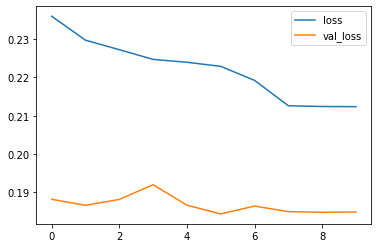

In [19]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
history_frame = pd.DataFrame(H.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
# history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# New Section